# Examples of Geometry Optimisation with NRLTB

In [3]:
using Plots, JuLIP, TightBinding, PyPlot
TB = TightBinding
NRLTB = TightBinding.NRLTB
using TB.Kwon.KwonTBModel
using TB.GammaPoint


In [ ]:
# TODO: implement zero-T model 

## Example  1: Vacancy 

In [4]:
# starting configuration
at = bulk("Si", cubic=true, pbc = true) * 4
deleteat!(at, length(at) ÷ 2)
# calculator
beta = 30.0
# calc = NRLTB.NRLTBModel(:Si, FermiDiracSmearing(beta), bzquad = TB.GammaPoint())
calc = KwonTBModel(potential = FermiDiracSmearing(beta), bzquad = GammaPoint())
# set the fermi-level
TB.set_δNel!(calc, at)
# minimise
set_constraint!(at, JuLIP.Constraints.InPlaneFixedCell(at))
set_calculator!(at, calc)
JuLIP.Solve.minimise!(at; verbose = 2, precond=JuLIP.Preconditioners.Exp(at))

LoadError: Must have finite starting value

In [8]:
calc.potential

TightBinding.FermiDiracSmearing(30.0,NaN,1022.0,true)

## Example  2: Edge dislocation dipole in Silicon

Note this example requires [MaterialsScienceTools](https://github.com/cortner/MaterialsScienceTools.jl) and [ComposeAtoms](https://github.com/cortner/ComposeAtoms.jl)

In [5]:
# 110 plane with edge dislocation dipole 
using MaterialsScienceTools, ComposeAtoms
SI = MaterialsScienceTools.Silicon
CA = ComposeAtoms

function plot_layers(at; rcutmult = 1.3, kwargs...)
    CA.display_layers(at, [1.9, 0.0], rcut = rcutmult * rnn("Si"), kwargs...)
end 
;

length(at) = 200

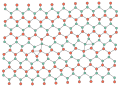

In [6]:
at = SI.edge_dipole_110(D = 4, L = (10, 5))
@show length(at)
set_pbc!(at, (false, false, true))
plot_layers(at)
;

In [8]:
# specify the TB Model (sp-NRLTB model for Si)
# with 
beta = 30.0
calc = NRLTB.NRLTBModel(:Si, FermiDiracSmearing(beta), bzquad = TB.GammaPoint())
# set the fermi-level
TB.set_δNel!(calc, at)
# pre-equilibrate with an interatomic potential
set_calculator!(at, JuLIP.Potentials.StillingerWeber())
set_constraint!(at, JuLIP.Constraints.InPlaneFixedCell(at))
JuLIP.Solve.minimise!(at; verbose = 2, precond=JuLIP.Preconditioners.Exp(at))
# proper equilibration
set_calculator!(at, calc)
JuLIP.Solve.minimise!(at; verbose = 2, precond=JuLIP.Preconditioners.Exp(at))


Iter     Function value   Gradient norm 
     0    -7.861103e+02     8.228933e+00
     1     2.444534e+12     0.000000e+00
Results of Optimization Algorithm
 * Algorithm: Conjugate Gradient
 * Starting Point: [0.2845125267273998,0.26131329986796614, ...]
 * Minimizer: [0.2845125267273998,0.26131329986796614, ...]
 * Minimum: -7.861103e+02
 * Iterations: 1
 * Convergence: true
   * |x - x'| < 1.0e-32: true
   * |f(x) - f(x')| / |f(x)| < 1.0e-32: false
   * |g(x)| < 1.0e-06: true
   * f(x) > f(x'): true
   * Reached Maximum Number of Iterations: false
 * Objective Function Calls: 4
 * Gradient Calls: 2


LoadError: PyError (:PyObject_Call) <type 'exceptions.ValueError'>
ValueError('unable to infer matrix dimensions',)
  File "/Users/ortner/anaconda/lib/python2.7/site-packages/pyamg-3.2.1.dev0+2227b77-py2.7-macosx-10.6-x86_64.egg/pyamg/classical/classical.py", line 112, in ruge_stuben_solver
    extend_hierarchy(levels, strength, CF, keep)
  File "/Users/ortner/anaconda/lib/python2.7/site-packages/pyamg-3.2.1.dev0+2227b77-py2.7-macosx-10.6-x86_64.egg/pyamg/classical/classical.py", line 173, in extend_hierarchy
    P = direct_interpolation(A, C, splitting)
  File "/Users/ortner/anaconda/lib/python2.7/site-packages/pyamg-3.2.1.dev0+2227b77-py2.7-macosx-10.6-x86_64.egg/pyamg/classical/interpolate.py", line 73, in direct_interpolation
    return csr_matrix((Px, Pj, Pp))
  File "/Users/ortner/anaconda/lib/python2.7/site-packages/scipy/sparse/compressed.py", line 90, in __init__
    raise ValueError('unable to infer matrix dimensions')
